## Compare Support vector Machines to a 3 layer Neural Networks on the titanic dataset 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combine=[train_df,test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [9]:
train_df.shape

(891, 12)

In [10]:
test_df.shape

(418, 11)

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nicholls, Mr. Joseph Charles",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [13]:
train_df[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [14]:
train_df[['Sex','Survived']].groupby('Sex').mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
train_df[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [16]:
train_df[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


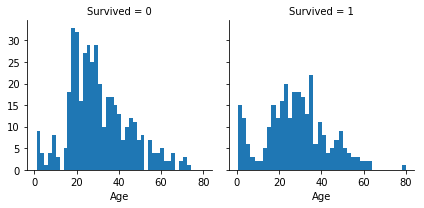

In [17]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=40)

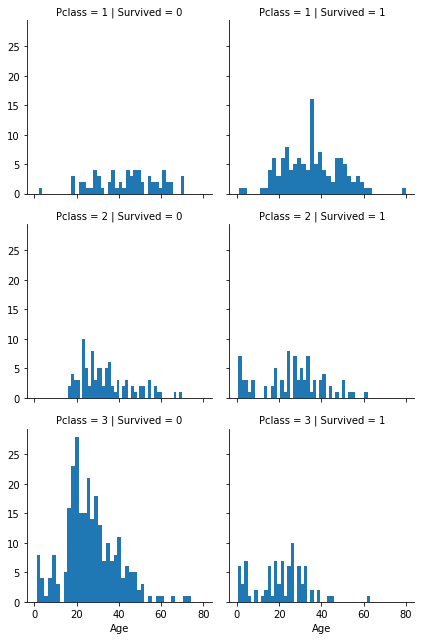

In [18]:
g=sns.FacetGrid(train_df,col='Survived',row='Pclass')
g.map(plt.hist,'Age',bins=40)

C:\Users\Tushar saini\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Tushar saini\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


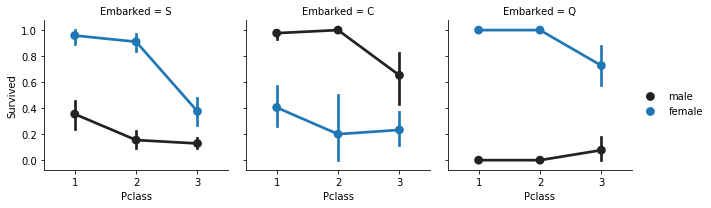

In [19]:
g=sns.FacetGrid(train_df,col='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

C:\Users\Tushar saini\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Tushar saini\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


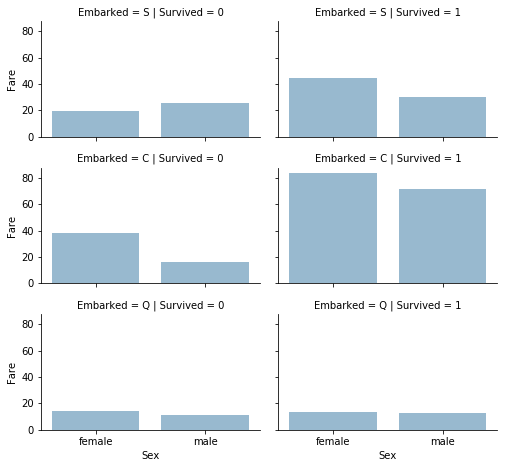

In [21]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Data Cleaning

In [22]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)

In [23]:
combine=[train_df,test_df]

In [24]:
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


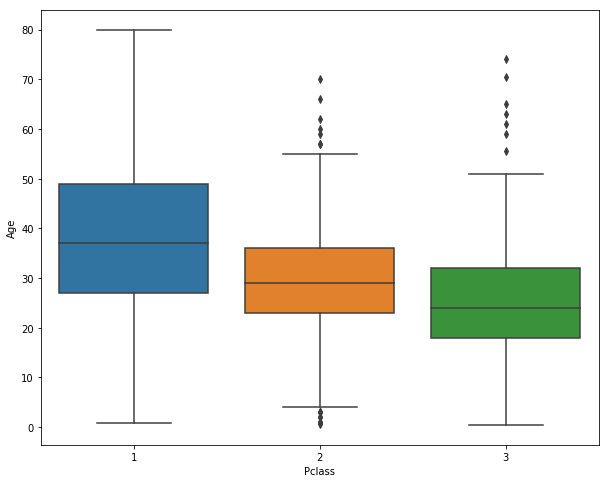

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(train_df['Pclass'],train_df['Age'])

In [26]:
def age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
test_df['Age']=train_df[['Age','Pclass']].apply(age,axis=1)

In [28]:
train_df['Age']=train_df[['Age','Pclass']].apply(age,axis=1)

In [29]:
combine=[train_df,test_df]

In [30]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool

In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [32]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
train_df[['IsAlone','Survived']].groupby(['IsAlone']).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1,1


In [34]:
train_df=train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df=test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine=[train_df,test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,S,1


In [35]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
Fare           False
Embarked        True
IsAlone        False
dtype: bool

In [36]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,1


In [39]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
Fare            True
Embarked       False
IsAlone        False
dtype: bool

In [40]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,892,3,"Kelly, Mr. James",0,22.0,7.8292,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,38.0,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,26.0,9.6875,2,1
3,895,3,"Wirz, Mr. Albert",0,35.0,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,35.0,12.2875,0,0


In [41]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
Fare           False
Embarked       False
IsAlone        False
dtype: bool

In [42]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,1


In [43]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,892,3,"Kelly, Mr. James",0,22.0,7.8292,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,38.0,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,26.0,9.6875,2,1
3,895,3,"Wirz, Mr. Albert",0,35.0,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,35.0,12.2875,0,0


In [44]:
train_df=train_df.drop(['Name'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
combine=[train_df,test_df]

In [45]:
train_df=train_df.drop(['PassengerId'],axis=1)
combine=[train_df,test_df]

### Perform SVM

In [46]:
X_train=train_df.drop(['Survived'],axis=1)
y_train=train_df['Survived']
X_test1=test_df.drop(['PassengerId'],axis=1).copy()
X_train.shape, y_train.shape, X_test1.shape

((891, 6), (891,), (418, 6))

In [47]:
from sklearn.svm import SVC

In [48]:
model1=SVC()

In [49]:
model1.fit(X_train,y_train)

C:\Users\Tushar saini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
svc_pred=model1.predict(X_test1)

In [51]:
SvmAccuracy=model1.score(X_train,y_train)

In [52]:
SVM_model_Accuracy=round(SvmAccuracy*100,2)

In [53]:
SVM_model_Accuracy

90.12

### 3 Layer neural Network

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25)

In [56]:
input_shape=X_train.shape[1]
input_shape

6

In [57]:
DL_model=None
insh=input_shape

In [58]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers
from keras import regularizers

Using TensorFlow backend.


In [59]:
model=Sequential()

model.add(Dense(8,activation='relu',input_shape=(6,)))
model.add(Dropout(0.3))
model.add(Dense(4,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 56        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(X_train,y_train,epochs=1000,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 3s - loss: 0.8648 - acc: 0.3922
Epoch 2/1000
 - 0s - loss: 0.7978 - acc: 0.4596
Epoch 3/1000
 - 0s - loss: 0.7317 - acc: 0.4731
Epoch 4/1000
 - 0s - loss: 0.7165 - acc: 0.5240
Epoch 5/1000
 - 0s - loss: 0.6856 - acc: 0.5704
Epoch 6/1000
 - 0s - loss: 0.6759 - acc: 0.6123
Epoch 7/1000
 - 0s - loss: 0.6605 - acc: 0.6317
Epoch 8/1000
 - 0s - loss: 0.6575 - acc: 0.6422
Epoch 9/1000
 - 0s - loss: 0.6513 - acc: 0.6362
Epoch 10/1000
 - 0s - loss: 0.6592 - acc: 0.6332
Epoch 11/1000
 - 0s - loss: 0.6526 - acc: 0.6362
Epoch 12/1000
 - 0s - loss: 0.6539 - acc: 0.6272
Epoch 13/1000
 - 0s - loss: 0.6456 - acc: 0.6557
Epoch 14/1000
 - 0s - loss: 0.6487 - acc: 0.6557
Epoch 15/1000
 - 0s - loss: 0.6455 - acc: 0.6243
Epoch 16/1000
 - 0s - loss: 0.6400 - acc: 0.6527
Epoch 17/1000
 - 0s - loss: 0.6551 - acc: 0.6377
Epoch 18/1000
 - 0s - loss: 0.6474 - acc: 0.6422
Epoch 19/1000
 - 0s - loss: 0.6519 - acc: 0.6332
Epoch 20/1000
 - 0s - loss: 0.

Epoch 162/1000
 - 0s - loss: 0.5430 - acc: 0.7096
Epoch 163/1000
 - 0s - loss: 0.5664 - acc: 0.7111
Epoch 164/1000
 - 0s - loss: 0.5605 - acc: 0.6976
Epoch 165/1000
 - 0s - loss: 0.5413 - acc: 0.7246
Epoch 166/1000
 - 0s - loss: 0.5572 - acc: 0.7051
Epoch 167/1000
 - 0s - loss: 0.5524 - acc: 0.7096
Epoch 168/1000
 - 0s - loss: 0.5482 - acc: 0.7260
Epoch 169/1000
 - 0s - loss: 0.5542 - acc: 0.7096
Epoch 170/1000
 - 0s - loss: 0.5568 - acc: 0.7096
Epoch 171/1000
 - 0s - loss: 0.5558 - acc: 0.7081
Epoch 172/1000
 - 0s - loss: 0.5723 - acc: 0.6991
Epoch 173/1000
 - 0s - loss: 0.5664 - acc: 0.6901
Epoch 174/1000
 - 0s - loss: 0.5621 - acc: 0.7066
Epoch 175/1000
 - 0s - loss: 0.5405 - acc: 0.7320
Epoch 176/1000
 - 0s - loss: 0.5378 - acc: 0.7455
Epoch 177/1000
 - 0s - loss: 0.5575 - acc: 0.7141
Epoch 178/1000
 - 0s - loss: 0.5684 - acc: 0.7006
Epoch 179/1000
 - 0s - loss: 0.5676 - acc: 0.7021
Epoch 180/1000
 - 0s - loss: 0.5569 - acc: 0.7141
Epoch 181/1000
 - 0s - loss: 0.5568 - acc: 0.7126


Epoch 326/1000
 - 0s - loss: 0.5359 - acc: 0.7096
Epoch 327/1000
 - 0s - loss: 0.5369 - acc: 0.7410
Epoch 328/1000
 - 0s - loss: 0.5509 - acc: 0.6991
Epoch 329/1000
 - 0s - loss: 0.5411 - acc: 0.7126
Epoch 330/1000
 - 0s - loss: 0.5364 - acc: 0.7305
Epoch 331/1000
 - 0s - loss: 0.5465 - acc: 0.7260
Epoch 332/1000
 - 0s - loss: 0.5452 - acc: 0.7246
Epoch 333/1000
 - 0s - loss: 0.5328 - acc: 0.7425
Epoch 334/1000
 - 0s - loss: 0.5269 - acc: 0.7425
Epoch 335/1000
 - 0s - loss: 0.5506 - acc: 0.7231
Epoch 336/1000
 - 0s - loss: 0.5365 - acc: 0.7350
Epoch 337/1000
 - 0s - loss: 0.5580 - acc: 0.7036
Epoch 338/1000
 - 0s - loss: 0.5495 - acc: 0.7335
Epoch 339/1000
 - 0s - loss: 0.5424 - acc: 0.7395
Epoch 340/1000
 - 0s - loss: 0.5333 - acc: 0.7290
Epoch 341/1000
 - 0s - loss: 0.5529 - acc: 0.7096
Epoch 342/1000
 - 0s - loss: 0.5411 - acc: 0.7275
Epoch 343/1000
 - 0s - loss: 0.5353 - acc: 0.7410
Epoch 344/1000
 - 0s - loss: 0.5345 - acc: 0.7275
Epoch 345/1000
 - 0s - loss: 0.5529 - acc: 0.7231


Epoch 490/1000
 - 0s - loss: 0.5270 - acc: 0.7350
Epoch 491/1000
 - 0s - loss: 0.5292 - acc: 0.7320
Epoch 492/1000
 - 0s - loss: 0.5563 - acc: 0.6871
Epoch 493/1000
 - 0s - loss: 0.5226 - acc: 0.7320
Epoch 494/1000
 - 0s - loss: 0.5038 - acc: 0.7515
Epoch 495/1000
 - 0s - loss: 0.5306 - acc: 0.7485
Epoch 496/1000
 - 0s - loss: 0.5332 - acc: 0.7290
Epoch 497/1000
 - 0s - loss: 0.5351 - acc: 0.7350
Epoch 498/1000
 - 0s - loss: 0.5232 - acc: 0.7380
Epoch 499/1000
 - 0s - loss: 0.5168 - acc: 0.7485
Epoch 500/1000
 - 0s - loss: 0.5091 - acc: 0.7530
Epoch 501/1000
 - 0s - loss: 0.5509 - acc: 0.7260
Epoch 502/1000
 - 0s - loss: 0.5264 - acc: 0.7305
Epoch 503/1000
 - 0s - loss: 0.5281 - acc: 0.7275
Epoch 504/1000
 - 0s - loss: 0.5239 - acc: 0.7246
Epoch 505/1000
 - 0s - loss: 0.5269 - acc: 0.7485
Epoch 506/1000
 - 0s - loss: 0.5074 - acc: 0.7485
Epoch 507/1000
 - 0s - loss: 0.5155 - acc: 0.7530
Epoch 508/1000
 - 0s - loss: 0.5207 - acc: 0.7246
Epoch 509/1000
 - 0s - loss: 0.5232 - acc: 0.7425


Epoch 654/1000
 - 0s - loss: 0.5167 - acc: 0.7485
Epoch 655/1000
 - 0s - loss: 0.5333 - acc: 0.7380
Epoch 656/1000
 - 0s - loss: 0.5131 - acc: 0.7320
Epoch 657/1000
 - 0s - loss: 0.5148 - acc: 0.7650
Epoch 658/1000
 - 0s - loss: 0.5316 - acc: 0.7320
Epoch 659/1000
 - 0s - loss: 0.5212 - acc: 0.7425
Epoch 660/1000
 - 0s - loss: 0.5422 - acc: 0.7260
Epoch 661/1000
 - 0s - loss: 0.5259 - acc: 0.7171
Epoch 662/1000
 - 0s - loss: 0.5318 - acc: 0.7275
Epoch 663/1000
 - 0s - loss: 0.5118 - acc: 0.7440
Epoch 664/1000
 - 0s - loss: 0.5070 - acc: 0.7470
Epoch 665/1000
 - 0s - loss: 0.5211 - acc: 0.7365
Epoch 666/1000
 - 0s - loss: 0.5274 - acc: 0.7260
Epoch 667/1000
 - 0s - loss: 0.5257 - acc: 0.7425
Epoch 668/1000
 - 0s - loss: 0.5103 - acc: 0.7410
Epoch 669/1000
 - 0s - loss: 0.5218 - acc: 0.7365
Epoch 670/1000
 - 0s - loss: 0.5463 - acc: 0.7350
Epoch 671/1000
 - 0s - loss: 0.5213 - acc: 0.7395
Epoch 672/1000
 - 0s - loss: 0.5238 - acc: 0.7380
Epoch 673/1000
 - 0s - loss: 0.5303 - acc: 0.7320


Epoch 818/1000
 - 0s - loss: 0.5114 - acc: 0.7305
Epoch 819/1000
 - 0s - loss: 0.5307 - acc: 0.7275
Epoch 820/1000
 - 0s - loss: 0.5093 - acc: 0.7485
Epoch 821/1000
 - 0s - loss: 0.5310 - acc: 0.7275
Epoch 822/1000
 - 0s - loss: 0.5263 - acc: 0.7141
Epoch 823/1000
 - 0s - loss: 0.5090 - acc: 0.7350
Epoch 824/1000
 - 0s - loss: 0.5156 - acc: 0.7350
Epoch 825/1000
 - 0s - loss: 0.5127 - acc: 0.7350
Epoch 826/1000
 - 0s - loss: 0.5327 - acc: 0.7290
Epoch 827/1000
 - 0s - loss: 0.5111 - acc: 0.7216
Epoch 828/1000
 - 0s - loss: 0.5276 - acc: 0.7096
Epoch 829/1000
 - 0s - loss: 0.5006 - acc: 0.7500
Epoch 830/1000
 - 0s - loss: 0.4969 - acc: 0.7515
Epoch 831/1000
 - 0s - loss: 0.5104 - acc: 0.7410
Epoch 832/1000
 - 0s - loss: 0.5057 - acc: 0.7455
Epoch 833/1000
 - 0s - loss: 0.5127 - acc: 0.7320
Epoch 834/1000
 - 0s - loss: 0.5164 - acc: 0.7455
Epoch 835/1000
 - 0s - loss: 0.5155 - acc: 0.7305
Epoch 836/1000
 - 0s - loss: 0.5059 - acc: 0.7305
Epoch 837/1000
 - 0s - loss: 0.5287 - acc: 0.7216


Epoch 982/1000
 - 0s - loss: 0.5100 - acc: 0.7410
Epoch 983/1000
 - 0s - loss: 0.5177 - acc: 0.7560
Epoch 984/1000
 - 0s - loss: 0.5042 - acc: 0.7665
Epoch 985/1000
 - 0s - loss: 0.4983 - acc: 0.7410
Epoch 986/1000
 - 0s - loss: 0.5146 - acc: 0.7380
Epoch 987/1000
 - 0s - loss: 0.5198 - acc: 0.7410
Epoch 988/1000
 - 0s - loss: 0.5117 - acc: 0.7500
Epoch 989/1000
 - 0s - loss: 0.5167 - acc: 0.7275
Epoch 990/1000
 - 0s - loss: 0.5125 - acc: 0.7365
Epoch 991/1000
 - 0s - loss: 0.5027 - acc: 0.7470
Epoch 992/1000
 - 0s - loss: 0.5012 - acc: 0.7425
Epoch 993/1000
 - 0s - loss: 0.5055 - acc: 0.7455
Epoch 994/1000
 - 0s - loss: 0.5151 - acc: 0.7335
Epoch 995/1000
 - 0s - loss: 0.5056 - acc: 0.7500
Epoch 996/1000
 - 0s - loss: 0.4966 - acc: 0.7320
Epoch 997/1000
 - 0s - loss: 0.5119 - acc: 0.7410
Epoch 998/1000
 - 0s - loss: 0.5180 - acc: 0.7260
Epoch 999/1000
 - 0s - loss: 0.5116 - acc: 0.7305
Epoch 1000/1000
 - 0s - loss: 0.5289 - acc: 0.7081


In [62]:
model.evaluate(X_test.values,y_test.values)

223/223 [==============================] - 0s 1ms/step


[0.5143471868048869, 0.7802690588305349]

In [63]:
nn_prediction=model.predict(X_test1)

### SVM model give higher accuracy than 3 layer Neural Network on this titanic survival prediction data

In [64]:
s=pd.DataFrame({"PassengerId":test_df['PassengerId'],
               'Survived':svc_pred})
s.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [65]:
s.to_csv('submission.csv',sep=',',index=False)

### END